# constructing 2D/3D local box using GeoPoints.jl 

Nobuaki Fuji (IPGP/UPC/IUF) December 2025

In [1]:
using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv"


include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

using .planet1D, .GeoPoints

  Activating 

  3.677406 seconds (4.58 M allocations: 209.573 MiB, 2.53% gc time, 99.98% compilation time)


project at `~/Documents/Github/flexOPT`


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 100.0 # in metre
Δz = 100.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [4]:
@show p1 # GeoPoint has some attributes

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [5]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)


(GeoPoint[GeoPoint(48.907887632772656, 2.359796896592829, -99838.236349905, [4.1310335068414416e6, 170237.94705026117, 4.708588583009119e6], 6.266197031478216e6) GeoPoint(48.90783553005014, 2.3597891713586034, -99738.40068796469, [4.1311033881302495e6, 170240.2688795216, 4.708660075768077e6], 6.266296885857039e6) … GeoPoint(48.84658480113155, 2.350718261091315, 19868.412401470814, [4.21482117212187e6, 173021.8203335292, 4.794308401000045e6], 6.3859257047962835e6) GeoPoint(48.8465346306368, 2.350710839849349, 19968.254166095423, [4.214891053410677e6, 173024.14216278965, 4.794379893759004e6], 6.3860255645881295e6); GeoPoint(48.90698048711516, 2.3596539064577184, -99843.96616668951, [4.1311049434455377e6, 170230.5636253266, 4.708518996396675e6], 6.26619163750844e6) GeoPoint(48.90692839876675, 2.359646183774253, -99744.1304135474, [4.131174824734345e6, 170232.88545458706, 4.708590489155632e6], 6.266291491973217e6) … GeoPoint(48.845694570202916, 2.350578265495784, 19862.789894269616, [4.214

In [6]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [1900.0, -97100.0], [0.9985613843374025, 0.05362053440772882], [-0.05362053440772882, 0.9985613843374025])

In [7]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,effectiveRadii,2.0)

(ρ = [3.3725411830199197 3.3725520415888193 … 0.0 0.0; 3.372540560394905 3.372551418973144 … 0.0 0.0; … ; 3.372294819306954 3.372305677881151 … 0.0 0.0; 3.3722953694174183 3.3723062279822686 … 0.0 0.0], Vpv = [7.936501067356701 7.936614263703209 … 0.0 0.0; 7.936494576733715 7.9366077731775775 … 0.0 0.0; … ; 7.933932821718081 7.934046018119805 … 0.0 0.0; 7.933938556405154 7.934051752709441 … 0.0 0.0], Vph = [8.135589067359291 8.135661476637637 … 0.0 0.0; 8.135584915446788 8.13565732478741 … 0.0 0.0; … ; 8.133946215632685 8.134018624946352 … 0.0 0.0; 8.133949883989176 8.134022293240514 … 0.0 0.0], Vsv = [4.413419311905491 4.413396293119483 … 0.0 0.0; 4.41342063179139 4.413397612985585 … 0.0 0.0; … ; 4.413941571665586 4.41391855286835 … 0.0 0.0; 4.413940405501318 4.413917386723897 … 0.0 0.0], Vsh = [4.544031640720238 4.54412130703096 … 0.0 0.0; 4.544026499297962 4.544116165685802 … 0.0 0.0; … ; 4.541997254288626 4.5420869206430865 … 0.0 0.0; 4.542001796910794 4.542091463188072 … 0.0 0.0],

In [8]:
Nx,Nz=size(allGridsInCartesian)

(6761, 1201)

In [9]:
maximum(seismicModel.ρ)

3.3807231008674763

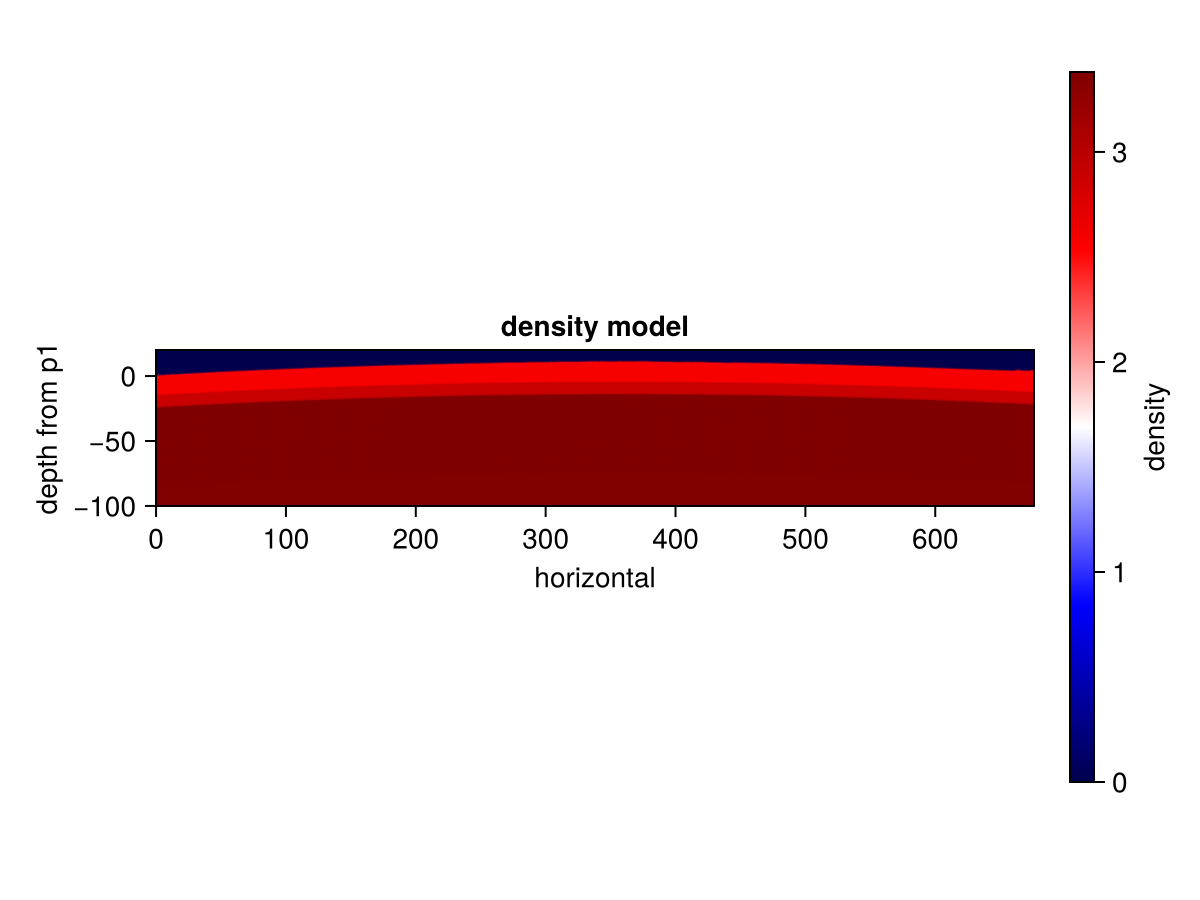

In [10]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    colormap = :seismic,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# 3D box ? yes

In [11]:
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 500.0 # in metre
Δy = 500.0
Δz = 500.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

horizontalDepth = 50.e3

50000.0

In [12]:

allGridsInGeoPoints3D, allGridsInCartesian3D, effectiveRadii3D=constructLocalBox(p1,p2,Δx,Δy,Δz,-horizontalDepth,horizontalDepth,altMin,altMax)

#ok 3D box version needs to be GPUed

(GeoPoint[GeoPoint(48.953024700409834, 1.6699999617332328, -99622.04780035623, [4.1292020409103264e6, 120387.9366562769, 4.711997717248603e6], 6.266396511337789e6) GeoPoint(48.95259378281589, 1.6769036925297778, -99626.17689891247, [4.1292203555696374e6, 120886.43676021673, 4.7119636259062085e6], 6.266392541750509e6) … GeoPoint(48.859144501936626, 3.0414217074040906, -99660.77110633299, [4.132846658113246e6, 219589.45734030558, 4.705213540112029e6], 6.266392541750509e6) GeoPoint(48.858631622728055, 3.048299688382775, -99656.99140021697, [4.132864972772557e6, 220087.95744424543, 4.705179448769635e6], 6.266396511337789e6); GeoPoint(48.9484852511813, 1.6693438244564294, -99650.68116192236, [4.129559223930806e6, 120351.0195316042, 4.711649784186381e6], 6.266369558259221e6) GeoPoint(48.94805436757178, 1.6762469656530674, -99654.81026827118, [4.129577538590117e6, 120849.51963554403, 4.711615692843987e6], 6.266365588654867e6) … GeoPoint(48.854613017100924, 3.0406490506728523, -99689.402244790

In [23]:
seismicModel3D=getParamsAndTopo(allGridsInGeoPoints3D,effectiveRadii3D,2.0)

┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_f6f52b33.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexOPT') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_f6f52b33.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(ρ = [3.372564668110668 3.3725642192835092 … 3.3725605156218705 3.3725609270406616; 3.372561556683719 3.3725611078558932 … 3.3725574044509328 3.372557815872983; … ; 3.3723159275235273 3.372315480399884 … 3.372312145104348 3.3723125585402665; 3.3723186761126236 3.372318228992166 … 3.3723148939837717 3.372315307419404;;; 3.372618959231797 3.372618510438966 … 3.372614806790639 3.3726152181752362; 3.37261584803816 3.372615399244662 … 3.3726116958529944 3.3726121072408506; … ; 3.3723702188710862 3.372369771781651 … 3.3723664364709105 3.3723668498724675; 3.372372967226693 3.372372520140443 … 3.372369185116821 3.3723695985180924;;; 3.3726732503658123 3.372672801607303 … 3.3726690979722855 3.3726695093226957; 3.3726701394054497 3.372669690646274 … 3.3726659872678972 3.3726663986215657; … ; 3.372424510231501 3.3724240631762683 … 3.3724207278503258 3.3724211412175262; 3.372427258353655 3.372426811301607 … 3.3724234762627594 3.3724238896296743;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.

In [24]:
using GLMakie
GLMakie.activate!()
Makie.inline!() 
Nx3D,Ny3D,Nz3D=size(allGridsInCartesian3D)
volume(collect((0:1:(Nx3D-1)).*Δx).*1.e-3,(collect(0:1:(Ny3D-1)).*Δy.-horizontalDepth).*1.e-3,(collect(0:1:(Nz3D-1)).*Δz.+altMin).*1.e-3,seismicModel3D.Vpv)


ErrorException: Encountered `Vector{Float64}` with value [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 83.0, 83.5, 84.0, 84.5, 85.0, 85.5, 86.0, 86.5, 87.0, 87.5, 88.0, 88.5, 89.0, 89.5, 90.0, 90.5, 91.0, 91.5, 92.0, 92.5, 93.0, 93.5, 94.0, 94.5, 95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 98.5, 99.0, 99.5, 100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 103.0, 103.5, 104.0, 104.5, 105.0, 105.5, 106.0, 106.5, 107.0, 107.5, 108.0, 108.5, 109.0, 109.5, 110.0, 110.5, 111.0, 111.5, 112.0, 112.5, 113.0, 113.5, 114.0, 114.5, 115.0, 115.5, 116.0, 116.5, 117.0, 117.5, 118.0, 118.5, 119.0, 119.5, 120.0, 120.5, 121.0, 121.5, 122.0, 122.5, 123.0, 123.5, 124.0, 124.5, 125.0, 125.5, 126.0, 126.5, 127.0, 127.5, 128.0, 128.5, 129.0, 129.5, 130.0, 130.5, 131.0, 131.5, 132.0, 132.5, 133.0, 133.5, 134.0, 134.5, 135.0, 135.5, 136.0, 136.5, 137.0, 137.5, 138.0, 138.5, 139.0, 139.5, 140.0, 140.5, 141.0, 141.5, 142.0, 142.5, 143.0, 143.5, 144.0, 144.5, 145.0, 145.5, 146.0, 146.5, 147.0, 147.5, 148.0, 148.5, 149.0, 149.5, 150.0, 150.5, 151.0, 151.5, 152.0, 152.5, 153.0, 153.5, 154.0, 154.5, 155.0, 155.5, 156.0, 156.5, 157.0, 157.5, 158.0, 158.5, 159.0, 159.5, 160.0, 160.5, 161.0, 161.5, 162.0, 162.5, 163.0, 163.5, 164.0, 164.5, 165.0, 165.5, 166.0, 166.5, 167.0, 167.5, 168.0, 168.5, 169.0, 169.5, 170.0, 170.5, 171.0, 171.5, 172.0, 172.5, 173.0, 173.5, 174.0, 174.5, 175.0, 175.5, 176.0, 176.5, 177.0, 177.5, 178.0, 178.5, 179.0, 179.5, 180.0, 180.5, 181.0, 181.5, 182.0, 182.5, 183.0, 183.5, 184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187.0, 187.5, 188.0, 188.5, 189.0, 189.5, 190.0, 190.5, 191.0, 191.5, 192.0, 192.5, 193.0, 193.5, 194.0, 194.5, 195.0, 195.5, 196.0, 196.5, 197.0, 197.5, 198.0, 198.5, 199.0, 199.5, 200.0, 200.5, 201.0, 201.5, 202.0, 202.5, 203.0, 203.5, 204.0, 204.5, 205.0, 205.5, 206.0, 206.5, 207.0, 207.5, 208.0, 208.5, 209.0, 209.5, 210.0, 210.5, 211.0, 211.5, 212.0, 212.5, 213.0, 213.5, 214.0, 214.5, 215.0, 215.5, 216.0, 216.5, 217.0, 217.5, 218.0, 218.5, 219.0, 219.5, 220.0, 220.5, 221.0, 221.5, 222.0, 222.5, 223.0, 223.5, 224.0, 224.5, 225.0, 225.5, 226.0, 226.5, 227.0, 227.5, 228.0, 228.5, 229.0, 229.5, 230.0, 230.5, 231.0, 231.5, 232.0, 232.5, 233.0, 233.5, 234.0, 234.5, 235.0, 235.5, 236.0, 236.5, 237.0, 237.5, 238.0, 238.5, 239.0, 239.5, 240.0, 240.5, 241.0, 241.5, 242.0, 242.5, 243.0, 243.5, 244.0, 244.5, 245.0, 245.5, 246.0, 246.5, 247.0, 247.5, 248.0, 248.5, 249.0, 249.5, 250.0, 250.5, 251.0, 251.5, 252.0, 252.5, 253.0, 253.5, 254.0, 254.5, 255.0, 255.5, 256.0, 256.5, 257.0, 257.5, 258.0, 258.5, 259.0, 259.5, 260.0, 260.5, 261.0, 261.5, 262.0, 262.5, 263.0, 263.5, 264.0, 264.5, 265.0, 265.5, 266.0, 266.5, 267.0, 267.5, 268.0, 268.5, 269.0, 269.5, 270.0, 270.5, 271.0, 271.5, 272.0, 272.5, 273.0, 273.5, 274.0, 274.5, 275.0, 275.5, 276.0, 276.5, 277.0, 277.5, 278.0, 278.5, 279.0, 279.5, 280.0, 280.5, 281.0, 281.5, 282.0, 282.5, 283.0, 283.5, 284.0, 284.5, 285.0, 285.5, 286.0, 286.5, 287.0, 287.5, 288.0, 288.5, 289.0, 289.5, 290.0, 290.5, 291.0, 291.5, 292.0, 292.5, 293.0, 293.5, 294.0, 294.5, 295.0, 295.5, 296.0, 296.5, 297.0, 297.5, 298.0, 298.5, 299.0, 299.5, 300.0, 300.5, 301.0, 301.5, 302.0, 302.5, 303.0, 303.5, 304.0, 304.5, 305.0, 305.5, 306.0, 306.5, 307.0, 307.5, 308.0, 308.5, 309.0, 309.5, 310.0, 310.5, 311.0, 311.5, 312.0, 312.5, 313.0, 313.5, 314.0, 314.5, 315.0, 315.5, 316.0, 316.5, 317.0, 317.5, 318.0, 318.5, 319.0, 319.5, 320.0, 320.5, 321.0, 321.5, 322.0, 322.5, 323.0, 323.5, 324.0, 324.5, 325.0, 325.5, 326.0, 326.5, 327.0, 327.5, 328.0, 328.5, 329.0, 329.5, 330.0, 330.5, 331.0, 331.5, 332.0, 332.5, 333.0, 333.5, 334.0, 334.5, 335.0, 335.5, 336.0, 336.5, 337.0, 337.5, 338.0, 338.5, 339.0, 339.5, 340.0, 340.5, 341.0, 341.5, 342.0, 342.5, 343.0, 343.5, 344.0, 344.5, 345.0, 345.5, 346.0, 346.5, 347.0, 347.5, 348.0, 348.5, 349.0, 349.5, 350.0, 350.5, 351.0, 351.5, 352.0, 352.5, 353.0, 353.5, 354.0, 354.5, 355.0, 355.5, 356.0, 356.5, 357.0, 357.5, 358.0, 358.5, 359.0, 359.5, 360.0, 360.5, 361.0, 361.5, 362.0, 362.5, 363.0, 363.5, 364.0, 364.5, 365.0, 365.5, 366.0, 366.5, 367.0, 367.5, 368.0, 368.5, 369.0, 369.5, 370.0, 370.5, 371.0, 371.5, 372.0, 372.5, 373.0, 373.5, 374.0, 374.5, 375.0, 375.5, 376.0, 376.5, 377.0, 377.5, 378.0, 378.5, 379.0, 379.5, 380.0, 380.5, 381.0, 381.5, 382.0, 382.5, 383.0, 383.5, 384.0, 384.5, 385.0, 385.5, 386.0, 386.5, 387.0, 387.5, 388.0, 388.5, 389.0, 389.5, 390.0, 390.5, 391.0, 391.5, 392.0, 392.5, 393.0, 393.5, 394.0, 394.5, 395.0, 395.5, 396.0, 396.5, 397.0, 397.5, 398.0, 398.5, 399.0, 399.5, 400.0, 400.5, 401.0, 401.5, 402.0, 402.5, 403.0, 403.5, 404.0, 404.5, 405.0, 405.5, 406.0, 406.5, 407.0, 407.5, 408.0, 408.5, 409.0, 409.5, 410.0, 410.5, 411.0, 411.5, 412.0, 412.5, 413.0, 413.5, 414.0, 414.5, 415.0, 415.5, 416.0, 416.5, 417.0, 417.5, 418.0, 418.5, 419.0, 419.5, 420.0, 420.5, 421.0, 421.5, 422.0, 422.5, 423.0, 423.5, 424.0, 424.5, 425.0, 425.5, 426.0, 426.5, 427.0, 427.5, 428.0, 428.5, 429.0, 429.5, 430.0, 430.5, 431.0, 431.5, 432.0, 432.5, 433.0, 433.5, 434.0, 434.5, 435.0, 435.5, 436.0, 436.5, 437.0, 437.5, 438.0, 438.5, 439.0, 439.5, 440.0, 440.5, 441.0, 441.5, 442.0, 442.5, 443.0, 443.5, 444.0, 444.5, 445.0, 445.5, 446.0, 446.5, 447.0, 447.5, 448.0, 448.5, 449.0, 449.5, 450.0, 450.5, 451.0, 451.5, 452.0, 452.5, 453.0, 453.5, 454.0, 454.5, 455.0, 455.5, 456.0, 456.5, 457.0, 457.5, 458.0, 458.5, 459.0, 459.5, 460.0, 460.5, 461.0, 461.5, 462.0, 462.5, 463.0, 463.5, 464.0, 464.5, 465.0, 465.5, 466.0, 466.5, 467.0, 467.5, 468.0, 468.5, 469.0, 469.5, 470.0, 470.5, 471.0, 471.5, 472.0, 472.5, 473.0, 473.5, 474.0, 474.5, 475.0, 475.5, 476.0, 476.5, 477.0, 477.5, 478.0, 478.5, 479.0, 479.5, 480.0, 480.5, 481.0, 481.5, 482.0, 482.5, 483.0, 483.5, 484.0, 484.5, 485.0, 485.5, 486.0, 486.5, 487.0, 487.5, 488.0, 488.5, 489.0, 489.5, 490.0, 490.5, 491.0, 491.5, 492.0, 492.5, 493.0, 493.5, 494.0, 494.5, 495.0, 495.5, 496.0, 496.5, 497.0, 497.5, 498.0, 498.5, 499.0, 499.5, 500.0, 500.5, 501.0, 501.5, 502.0, 502.5, 503.0, 503.5, 504.0, 504.5, 505.0, 505.5, 506.0, 506.5, 507.0, 507.5, 508.0, 508.5, 509.0, 509.5, 510.0, 510.5, 511.0, 511.5, 512.0, 512.5, 513.0, 513.5, 514.0, 514.5, 515.0, 515.5, 516.0, 516.5, 517.0, 517.5, 518.0, 518.5, 519.0, 519.5, 520.0, 520.5, 521.0, 521.5, 522.0, 522.5, 523.0, 523.5, 524.0, 524.5, 525.0, 525.5, 526.0, 526.5, 527.0, 527.5, 528.0, 528.5, 529.0, 529.5, 530.0, 530.5, 531.0, 531.5, 532.0, 532.5, 533.0, 533.5, 534.0, 534.5, 535.0, 535.5, 536.0, 536.5, 537.0, 537.5, 538.0, 538.5, 539.0, 539.5, 540.0, 540.5, 541.0, 541.5, 542.0, 542.5, 543.0, 543.5, 544.0, 544.5, 545.0, 545.5, 546.0, 546.5, 547.0, 547.5, 548.0, 548.5, 549.0, 549.5, 550.0, 550.5, 551.0, 551.5, 552.0, 552.5, 553.0, 553.5, 554.0, 554.5, 555.0, 555.5, 556.0, 556.5, 557.0, 557.5, 558.0, 558.5, 559.0, 559.5, 560.0, 560.5, 561.0, 561.5, 562.0, 562.5, 563.0, 563.5, 564.0, 564.5, 565.0, 565.5, 566.0, 566.5, 567.0, 567.5, 568.0, 568.5, 569.0, 569.5, 570.0, 570.5, 571.0, 571.5, 572.0, 572.5, 573.0, 573.5, 574.0, 574.5, 575.0, 575.5, 576.0, 576.5, 577.0, 577.5, 578.0, 578.5, 579.0, 579.5, 580.0, 580.5, 581.0, 581.5, 582.0, 582.5, 583.0, 583.5, 584.0, 584.5, 585.0, 585.5, 586.0, 586.5, 587.0, 587.5, 588.0, 588.5, 589.0, 589.5, 590.0, 590.5, 591.0, 591.5, 592.0, 592.5, 593.0, 593.5, 594.0, 594.5, 595.0, 595.5, 596.0, 596.5, 597.0, 597.5, 598.0, 598.5, 599.0, 599.5, 600.0, 600.5, 601.0, 601.5, 602.0, 602.5, 603.0, 603.5, 604.0, 604.5, 605.0, 605.5, 606.0, 606.5, 607.0, 607.5, 608.0, 608.5, 609.0, 609.5, 610.0, 610.5, 611.0, 611.5, 612.0, 612.5, 613.0, 613.5, 614.0, 614.5, 615.0, 615.5, 616.0, 616.5, 617.0, 617.5, 618.0, 618.5, 619.0, 619.5, 620.0, 620.5, 621.0, 621.5, 622.0, 622.5, 623.0, 623.5, 624.0, 624.5, 625.0, 625.5, 626.0, 626.5, 627.0, 627.5, 628.0, 628.5, 629.0, 629.5, 630.0, 630.5, 631.0, 631.5, 632.0, 632.5, 633.0, 633.5, 634.0, 634.5, 635.0, 635.5, 636.0, 636.5, 637.0, 637.5, 638.0, 638.5, 639.0, 639.5, 640.0, 640.5, 641.0, 641.5, 642.0, 642.5, 643.0, 643.5, 644.0, 644.5, 645.0, 645.5, 646.0, 646.5, 647.0, 647.5, 648.0, 648.5, 649.0, 649.5, 650.0, 650.5, 651.0, 651.5, 652.0, 652.5, 653.0, 653.5, 654.0, 654.5, 655.0, 655.5, 656.0, 656.5, 657.0, 657.5, 658.0, 658.5, 659.0, 659.5, 660.0, 660.5, 661.0, 661.5, 662.0, 662.5, 663.0, 663.5, 664.0, 664.5, 665.0, 665.5, 666.0, 666.5, 667.0, 667.5, 668.0, 668.5, 669.0, 669.5, 670.0, 670.5, 671.0, 671.5, 672.0, 672.5, 673.0, 673.5, 674.0, 674.5, 675.0, 675.5, 676.0] on side x in `convert_arguments` for the `VolumeLike`
        conversion. Using `Vector{Float64}` to specify one dimension of `VolumeLike` is deprecated because `VolumeLike`
        sides always need exactly two values, start and stop. Use interval notation `start .. stop`,
        a two-element tuple `(start, stop)` or `Makie.EndPoints(start, stop)` instead.

# another way of importing model parameters

In [ ]:
include("../src/imageReader.jl")
using .imageReader

here, i try to use some of heritages from demo1.ipynb (flex in myOwnApplications in the old version)

# now construction of OPT operators

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [ ]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

In [ ]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



In [ ]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

In [ ]:
Nx,Ny,Nz=size(allGridsInCartesian)

In [ ]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

In [ ]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig